<a href="https://colab.research.google.com/github/Sisterno/ML_RedesNeuronales/blob/master/Medelo_entrenamiento__IT02_D001-%3ED006_try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import pathlib

path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)

from google.colab import drive
drive.mount('/content/drive')

batch_size = 32
img_height = 180
img_width = 180

#-------------------------------------------------------------------------------
# def obtenerTimer():
#   class TimingCallback(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.times = []
#     def on_epoch_begin(self, batch, logs={}):
#         self.epoch_time_start = time()
#     def on_epoch_end(self, batch, logs={}):
#         self.times.append(time() - self.epoch_time_start)
#   cb = TimingCallback()
#   return cb

class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()
    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)
#-------------------------------------------------------------------------------

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 59877 files belonging to 5 classes.
Using 47902 files for training.
Found 59877 files belonging to 5 classes.
Using 11975 files for validation.


## Modelo DS002-I02-D001

In [18]:
#-------------------------------------------------------------------------------

cb_I02_D001 = TimingCallback()
num_classes = 5
epochs=20

model_I02_D001 = Sequential([
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='relu'),
  layers.Dense(num_classes)
])
# model_I02_D001 = Sequential([
#   layers.Conv2D (16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])
model_I02_D001.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history_I02_D001 = model_I02_D001.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I02_D001]
)
model_I02_D001.summary()

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 113s 75ms/step - loss: 2.0991 - accuracy: 0.3249 - val_loss: 1.5575 - val_accuracy: 0.3240
Epoch 2/20
1497/1497 [==============================] - 113s 75ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 3/20
1497/1497 [==============================] - 114s 76ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 4/20
1497/1497 [==============================] - 114s 76ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 5/20
1497/1497 [==============================] - 113s 75ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 6/20
1497/1497 [==============================] - 112s 75ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 7/20
1497/1497 [==============================] - 112s 75ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1

[112.88717293739319, 112.751056432724, 114.4081916809082, 113.54383516311646, 112.62934875488281, 112.24445915222168, 112.36365103721619, 112.92636108398438, 112.75285696983337, 112.83057165145874, 112.13944602012634, 112.68991684913635, 112.74781703948975, 112.48192286491394, 112.38284420967102, 112.51080060005188, 112.56146144866943, 112.7219750881195, 112.90441608428955, 112.68517422676086]
El entrenamiento se demoro: 2255.1632792949677 segundos
El entrenamiento se demoro: 37.586054654916126 minutos
accuracy => 0.3270009458065033
loss => 1.5554836988449097
val_accuracy => 0.32400834560394287
val_loss => 1.5574318170547485


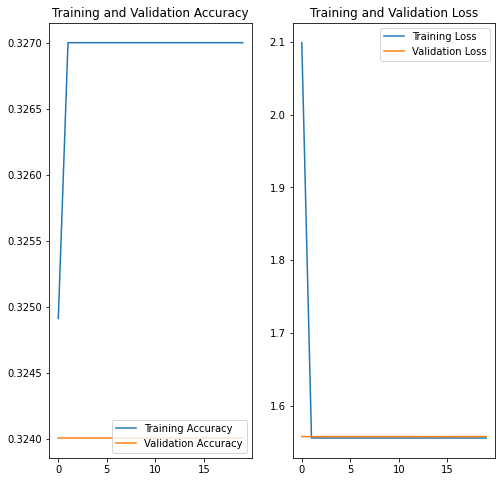

In [20]:
#-------------------------------------------------------------------------------

print(cb_I02_D001.times)
final_time = 0
for time in cb_I02_D001.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I02_D001.history['accuracy'])))
print('loss => '+ str(min(history_I02_D001.history['loss'])))
print('val_accuracy => '+ str(max(history_I02_D001.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I02_D001.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I02_D001.history['accuracy']
val_acc = history_I02_D001.history['val_accuracy']

loss=history_I02_D001.history['loss']
val_loss=history_I02_D001.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I02-D002

In [2]:
#-------------------------------------------------------------------------------

cb_I02_D002 = TimingCallback()
num_classes = 5
epochs=20

model_I02_D002 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_I02_D002.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I02_D002.summary()


history_I02_D002 = model_I02_D002.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I02_D002]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 8285s 5s/step - loss: 1.5594 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 2/20
1497/1497 [==============================] - 114s 76ms/step - loss: 1.5562 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 3/20
1497/1497 [==============================] - 114s 76ms/step - loss: 1.5567 - accuracy: 0.3267 - val_loss: 1.5579 - val_accuracy: 0.3240
Epoch 4/20
1497/1497 [==============================] - 114s 76ms/step - loss: 1.5562 - accuracy: 0.3270 - val_loss: 1.5578 - val_accuracy: 0.3240
Epoch 5/20
1497/1497 [==============================] - 113s 75ms/step - loss: 1.5563 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 6/20
1497/1497 [==============================] - 113s 75ms/step - loss: 1.5563 - accuracy: 0.3270 - val_loss: 1.5577 - val_accuracy: 0.3240
Epoch 7/20
1497/1497 [==============================] - 114s 76ms/step - loss: 1.5563 - accuracy: 0.3270 - val_loss: 1.

[8285.361640691757, 113.78701949119568, 113.81784892082214, 113.91875076293945, 112.86667895317078, 113.03308701515198, 114.10665130615234, 113.28520584106445, 111.90852379798889, 112.36748814582825, 112.9657826423645, 112.41867446899414, 114.32024025917053, 118.22094702720642, 118.79870820045471, 120.32286810874939, 120.814626455307, 120.13576555252075, 121.36056685447693, 120.60447096824646]
El entrenamiento se demoro: 10484.415545463562 segundos
El entrenamiento se demoro: 174.74025909105936 minutos
accuracy => 0.3270009458065033
loss => 1.5562047958374023
val_accuracy => 0.32400834560394287
val_loss => 1.5575828552246094


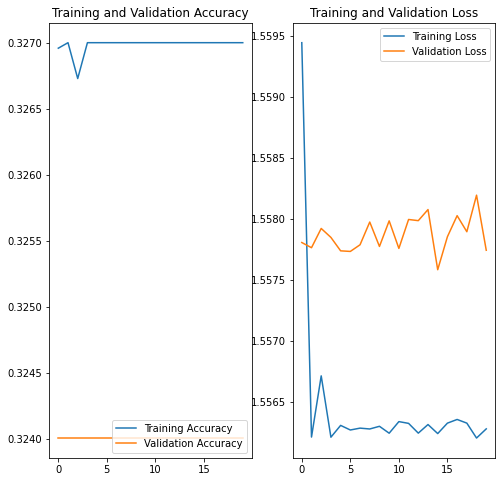

In [3]:
#-------------------------------------------------------------------------------

print(cb_I02_D002.times)
final_time = 0
for time in cb_I02_D002.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I02_D002.history['accuracy'])))
print('loss => '+ str(min(history_I02_D002.history['loss'])))
print('val_accuracy => '+ str(max(history_I02_D002.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I02_D002.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I02_D002.history['accuracy']
val_acc = history_I02_D002.history['val_accuracy']

loss=history_I02_D002.history['loss']
val_loss=history_I02_D002.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I02-D003

In [15]:
#-------------------------------------------------------------------------------

cb_I02_D003 = TimingCallback()
num_classes = 5
epochs=15

model_I02_D003 = Sequential([
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='relu'),
  layers.Dense(num_classes)
])
model_I02_D003.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accu    racy'])
# model_I02_D003.summary()


history_I02_D003 = model_I02_D003.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I02_D003]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 114s 75ms/step - loss: 1.5852 - accuracy: 0.3236 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 2/15
1497/1497 [==============================] - 113s 75ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 3/15
1497/1497 [==============================] - 113s 75ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 4/15
1497/1497 [==============================] - 113s 75ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 5/15
1497/1497 [==============================] - 113s 75ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 6/15
1497/1497 [==============================] - 113s 75ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1.5574 - val_accuracy: 0.3240
Epoch 7/15
1497/1497 [==============================] - 113s 75ms/step - loss: 1.5555 - accuracy: 0.3270 - val_loss: 1

[113.85071015357971, 112.83963322639465, 113.27350616455078, 113.23794317245483, 112.99904465675354, 113.14695453643799, 112.94607710838318, 112.62101578712463, 114.4501633644104, 114.09676957130432, 113.62723016738892, 113.7115728855133, 113.81742739677429, 113.48241996765137, 113.84278345108032]
El entrenamiento se demoro: 1701.9432516098022 segundos
El entrenamiento se demoro: 28.36572086016337 minutos
accuracy => 0.3270009458065033
loss => 1.5554836988449097
val_accuracy => 0.32400834560394287
val_loss => 1.5574318170547485


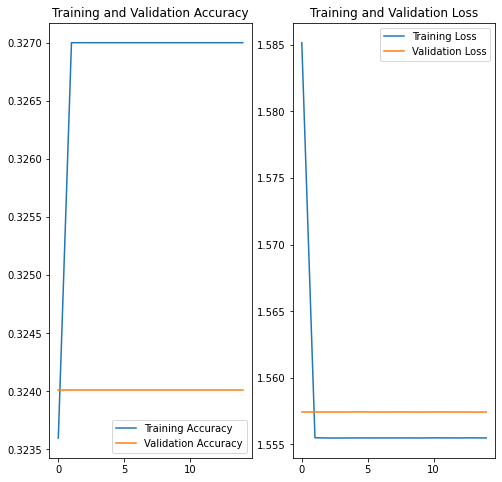

In [16]:
#-------------------------------------------------------------------------------

print(cb_I02_D003.times)
final_time = 0
for time in cb_I02_D003.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I02_D003.history['accuracy'])))
print('loss => '+ str(min(history_I02_D003.history['loss'])))
print('val_accuracy => '+ str(max(history_I02_D003.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I02_D003.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I02_D003.history['accuracy']
val_acc = history_I02_D003.history['val_accuracy']

loss=history_I02_D003.history['loss']
val_loss=history_I02_D003.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I02-D004

In [12]:
#-------------------------------------------------------------------------------

cb_I02_D004 = TimingCallback()
num_classes = 5
epochs=15

model_I02_D004 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_I02_D004.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I02_D004.summary()


history_I02_D004 = model_I02_D004.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I02_D004]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 115s 76ms/step - loss: 1.2861 - accuracy: 0.4601 - val_loss: 1.0435 - val_accuracy: 0.5609
Epoch 2/15
1497/1497 [==============================] - 114s 76ms/step - loss: 0.8977 - accuracy: 0.6272 - val_loss: 0.7548 - val_accuracy: 0.6851
Epoch 3/15
1497/1497 [==============================] - 114s 76ms/step - loss: 0.7236 - accuracy: 0.6963 - val_loss: 0.6909 - val_accuracy: 0.7278
Epoch 4/15
1497/1497 [==============================] - 115s 76ms/step - loss: 0.6425 - accuracy: 0.7512 - val_loss: 0.6507 - val_accuracy: 0.7441
Epoch 5/15
1497/1497 [==============================] - 115s 76ms/step - loss: 0.5802 - accuracy: 0.7837 - val_loss: 0.5645 - val_accuracy: 0.7841
Epoch 6/15
1497/1497 [==============================] - 114s 76ms/step - loss: 0.5404 - accuracy: 0.8001 - val_loss: 0.5485 - val_accuracy: 0.7896
Epoch 7/15
1497/1497 [==============================] - 115s 76ms/step - loss: 0.5037 - accuracy: 0.8122 - val_loss: 0

[114.86585807800293, 114.36349630355835, 114.47418880462646, 114.57122468948364, 114.76682901382446, 114.22511267662048, 114.51145696640015, 114.31966280937195, 114.369863986969, 114.17386436462402, 114.65193819999695, 115.16173505783081, 114.02063870429993, 114.36116099357605, 114.86339831352234]
El entrenamiento se demoro: 1717.7004289627075 segundos
El entrenamiento se demoro: 28.628340482711792 minutos
accuracy => 0.8685023784637451
loss => 0.34248799085617065
val_accuracy => 0.8574530482292175
val_loss => 0.3648199737071991


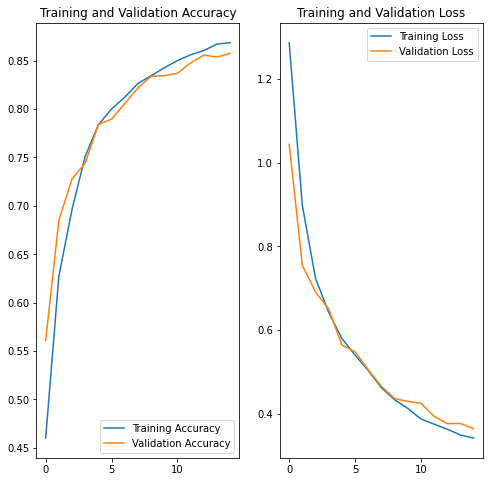

In [13]:
#-------------------------------------------------------------------------------

print(cb_I02_D004.times)
final_time = 0
for time in cb_I02_D004.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I02_D004.history['accuracy'])))
print('loss => '+ str(min(history_I02_D004.history['loss'])))
print('val_accuracy => '+ str(max(history_I02_D004.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I02_D004.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I02_D004.history['accuracy']
val_acc = history_I02_D004.history['val_accuracy']

loss=history_I02_D004.history['loss']
val_loss=history_I02_D004.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I02-D005

In [9]:
#-------------------------------------------------------------------------------

cb_I02_D005 = TimingCallback()
num_classes = 5
epochs=15

model_I02_D005 = Sequential([
  layers.Conv2D(4, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='relu'),
  layers.Dense(num_classes)
])
model_I02_D005.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I02_D005.summary()


history_I02_D005 = model_I02_D005.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I02_D005]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 112s 74ms/step - loss: 0.9325 - accuracy: 0.6198 - val_loss: 0.7643 - val_accuracy: 0.6807
Epoch 2/15
1497/1497 [==============================] - 111s 74ms/step - loss: 0.6781 - accuracy: 0.7214 - val_loss: 0.6490 - val_accuracy: 0.7358
Epoch 3/15
1497/1497 [==============================] - 111s 74ms/step - loss: 0.5902 - accuracy: 0.7616 - val_loss: 0.5305 - val_accuracy: 0.7844
Epoch 4/15
1497/1497 [==============================] - 111s 74ms/step - loss: 0.5355 - accuracy: 0.7837 - val_loss: 0.5166 - val_accuracy: 0.7911
Epoch 5/15
1497/1497 [==============================] - 111s 74ms/step - loss: 0.4958 - accuracy: 0.8019 - val_loss: 0.4701 - val_accuracy: 0.8166
Epoch 6/15
1497/1497 [==============================] - 111s 74ms/step - loss: 0.4671 - accuracy: 0.8154 - val_loss: 0.4537 - val_accuracy: 0.8241
Epoch 7/15
1497/1497 [==============================] - 111s 74ms/step - loss: 0.4411 - accuracy: 0.8268 - val_loss: 0

[112.46989822387695, 110.69289660453796, 110.74809837341309, 110.76362419128418, 110.85988450050354, 110.89840245246887, 111.10570812225342, 110.63773608207703, 111.17580676078796, 110.711989402771, 110.58779811859131, 110.7643928527832, 110.99290466308594, 111.06355619430542, 112.80889558792114]
El entrenamiento se demoro: 1666.281592130661 segundos
El entrenamiento se demoro: 27.77135986884435 minutos
accuracy => 0.8679178357124329
loss => 0.3419119417667389
val_accuracy => 0.8604592680931091
val_loss => 0.3638920187950134


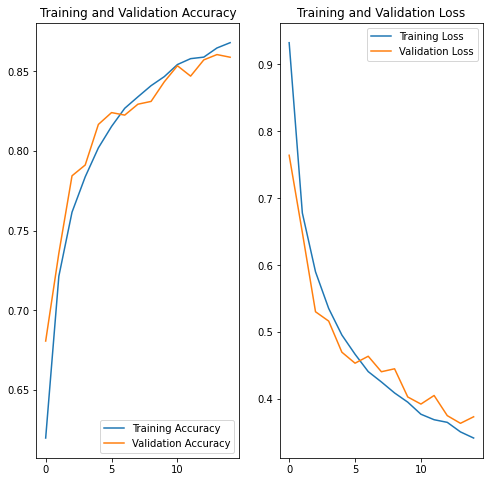

In [10]:
#-------------------------------------------------------------------------------

print(cb_I02_D005.times)
final_time = 0
for time in cb_I02_D005.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I02_D005.history['accuracy'])))
print('loss => '+ str(min(history_I02_D005.history['loss'])))
print('val_accuracy => '+ str(max(history_I02_D005.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I02_D005.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I02_D005.history['accuracy']
val_acc = history_I02_D005.history['val_accuracy']

loss=history_I02_D005.history['loss']
val_loss=history_I02_D005.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I02-D006

In [6]:
#-------------------------------------------------------------------------------

cb_I02_D006 = TimingCallback()
num_classes = 5
epochs=20

model_I02_D006 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(32, activation='sigmoid'),
  layers.Dense(num_classes)
])
model_I02_D006.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I02_D006.summary()


history_I02_D006 = model_I02_D006.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I02_D006]
)

#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 121s 80ms/step - loss: 1.2368 - accuracy: 0.4694 - val_loss: 0.9660 - val_accuracy: 0.5853
Epoch 2/20
1497/1497 [==============================] - 123s 82ms/step - loss: 0.8938 - accuracy: 0.6172 - val_loss: 0.8417 - val_accuracy: 0.6574
Epoch 3/20
1497/1497 [==============================] - 114s 76ms/step - loss: 0.7704 - accuracy: 0.6877 - val_loss: 0.7139 - val_accuracy: 0.7166
Epoch 4/20
1497/1497 [==============================] - 114s 76ms/step - loss: 0.7180 - accuracy: 0.7081 - val_loss: 0.7048 - val_accuracy: 0.7193
Epoch 5/20
1497/1497 [==============================] - 114s 76ms/step - loss: 0.6889 - accuracy: 0.7152 - val_loss: 0.6555 - val_accuracy: 0.7349
Epoch 6/20
1497/1497 [==============================] - 118s 79ms/step - loss: 0.6631 - accuracy: 0.7234 - val_loss: 0.6459 - val_accuracy: 0.7366
Epoch 7/20
1497/1497 [==============================] - 121s 80ms/step - loss: 0.6375 - accuracy: 0.7347 - val_loss: 0

[120.6585021018982, 123.14734506607056, 113.610764503479, 114.39610457420349, 114.09305787086487, 118.16315031051636, 120.73725271224976, 120.03169989585876, 121.98977398872375, 122.71774816513062, 123.02390646934509, 122.66838955879211, 124.44166088104248, 124.17272543907166, 115.01476526260376, 115.028071641922, 114.62666535377502, 114.88557529449463, 120.1383867263794, 118.11421990394592]
El entrenamiento se demoro: 2381.6597657203674 segundos
El entrenamiento se demoro: 39.69432942867279 minutos
accuracy => 0.8763517141342163
loss => 0.3134159445762634
val_accuracy => 0.8862630724906921
val_loss => 0.2983795702457428


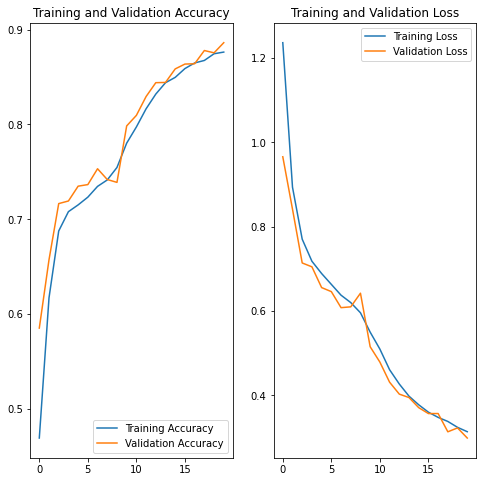

In [7]:
#-------------------------------------------------------------------------------

print(cb_I02_D006.times)
final_time = 0
for time in cb_I02_D006.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I02_D006.history['accuracy'])))
print('loss => '+ str(min(history_I02_D006.history['loss'])))
print('val_accuracy => '+ str(max(history_I02_D006.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I02_D006.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I02_D006.history['accuracy']
val_acc = history_I02_D006.history['val_accuracy']

loss=history_I02_D006.history['loss']
val_loss=history_I02_D006.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()